
Training Deep RNN...
Epoch 1/15


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - accuracy: 0.5005 - loss: 0.7396 - val_accuracy: 0.4781 - val_loss: 0.7315
Epoch 2/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.6320 - loss: 0.6343 - val_accuracy: 0.4844 - val_loss: 0.7312
Epoch 3/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.6803 - loss: 0.6103 - val_accuracy: 0.4781 - val_loss: 0.7377
Epoch 4/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.7170 - loss: 0.5862 - val_accuracy: 0.4812 - val_loss: 0.7465
Epoch 5/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.7535 - loss: 0.5607 - val_accuracy: 0.4875 - val_loss: 0.7581
Epoch 6/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.7743 - loss: 0.5330 - val_accuracy: 0.5000 - val_loss: 0.7733
Epoch 7/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7925 - loss: 0.5019 - val_accuracy: 0.5063 - val_loss: 0.7936
Epoch 8/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8147 - loss: 0.4665 - val_accuracy: 0.4906 - val_loss: 0.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 8s 47ms/step - accuracy: 0.4950 - loss: 0.7410 - val_accuracy: 0.5094 - val_loss: 0.7271
Epoch 2/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.6726 - loss: 0.6093 - val_accuracy: 0.5250 - val_loss: 0.7359
Epoch 3/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.7244 - loss: 0.5755 - val_accuracy: 0.5312 - val_loss: 0.7476
Epoch 4/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.7649 - loss: 0.5348 - val_accuracy: 0.5406 - val_loss: 0.7621
Epoch 5/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8074 - loss: 0.4900 - val_accuracy: 0.5281 - val_loss: 0.7785
Epoch 6/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.8676 - loss: 0.4394 - val_accuracy: 0.5344 - val_loss: 0.7984
Epoch 7/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9073 - loss: 0.3821 - val_accuracy: 0.5344 - val_loss: 0.8250
Epoch 8/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9311 - loss: 0.3187 - val_accuracy: 0.5219 - val_loss: 0.

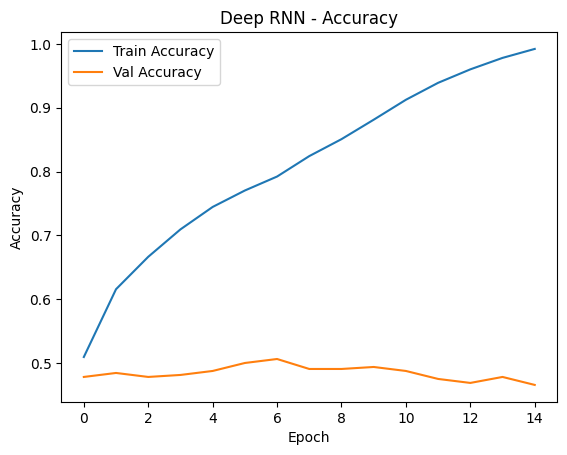

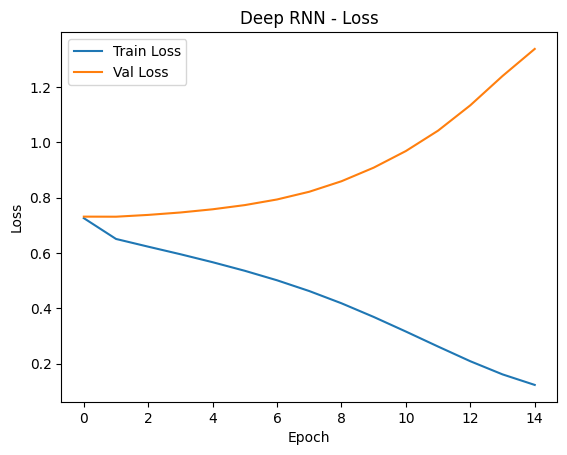

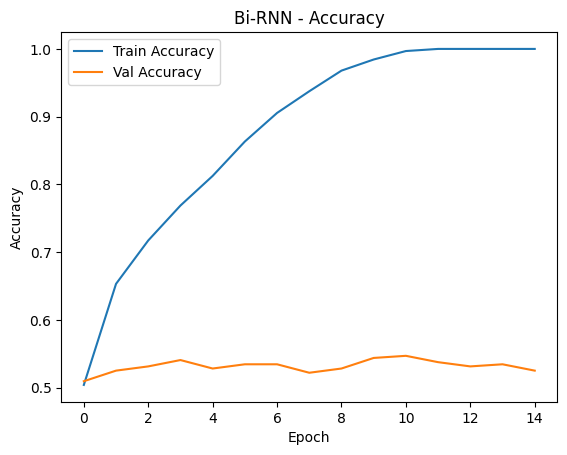

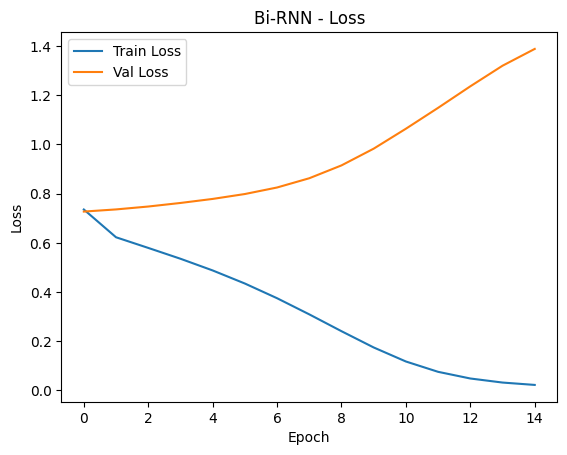


Observations:
- Deep RNNs improve performance by stacking layers, allowing them to capture more complex sequence features.
- Bi-RNNs can capture context from both past and future inputs, often resulting in better performance.
- Bi-RNNs tend to require more computational resources due to processing data in both directions.


In [ ]:
# 1. Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Bidirectional, Dense

# Set seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# 2. Generate a synthetic sequential dataset
num_samples = 2000
timesteps = 20
features = 10

X = np.random.randn(num_samples, timesteps, features)
y = np.random.randint(2, size=(num_samples, 1))

# 3. Preprocess and normalize the dataset
X_reshaped = X.reshape(-1, features)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_reshaped)
X = X_scaled.reshape(num_samples, timesteps, features)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Define a Deep RNN model
def build_deep_rnn():
    model = Sequential()
    model.add(SimpleRNN(64, return_sequences=True, activation='tanh', input_shape=(timesteps, features)))
    model.add(SimpleRNN(32, activation='tanh'))
    model.add(Dense(1, activation='sigmoid'))
    return model

# 6. Define a Bidirectional RNN model
def build_birnn():
    model = Sequential()
    model.add(Bidirectional(SimpleRNN(64, return_sequences=True), input_shape=(timesteps, features)))
    model.add(Bidirectional(SimpleRNN(32)))
    model.add(Dense(1, activation='sigmoid'))
    return model

# 5 & 7. Compile and train models
def compile_and_train(model, X_train, y_train, model_name, epochs=15, batch_size=32):
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    print(f"\nTraining {model_name}...")
    history = model.fit(X_train, y_train, validation_split=0.2, epochs=epochs, batch_size=batch_size, verbose=1)
    return history

# Train Deep RNN
deep_rnn_model = build_deep_rnn()
history_deep = compile_and_train(deep_rnn_model, X_train, y_train, "Deep RNN")

# Train Bi-RNN
birnn_model = build_birnn()
history_birnn = compile_and_train(birnn_model, X_train, y_train, "Bi-RNN")

# 8. Evaluate and Compare the Models
loss_deep, acc_deep = deep_rnn_model.evaluate(X_test, y_test, verbose=0)
loss_birnn, acc_birnn = birnn_model.evaluate(X_test, y_test, verbose=0)

print("\nPerformance on Test Data:")
print(f"Deep RNN  - Loss: {loss_deep:.4f}, Accuracy: {acc_deep:.4f}")
print(f"Bi-RNN    - Loss: {loss_birnn:.4f}, Accuracy: {acc_birnn:.4f}")

# Plotting
def plot_metrics(history, title_prefix):
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title(f'{title_prefix} - Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title(f'{title_prefix} - Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

plot_metrics(history_deep, "Deep RNN")
plot_metrics(history_birnn, "Bi-RNN")

# Observations
print("\nObservations:")
print("- Deep RNNs improve performance by stacking layers, allowing them to capture more complex sequence features.")
print("- Bi-RNNs can capture context from both past and future inputs, often resulting in better performance.")
print("- Bi-RNNs tend to require more computational resources due to processing data in both directions.")
